In [157]:
import numpy as np
import pandas as pd

Let's read the dataset

Our goal is to use K-means to find patterns between patients

In [158]:
df = pd.read_csv("/Users/simoneboesso/Desktop/PatientSegmentationCancer/leukemia_cancer_cell.tsv",sep="\t",on_bad_lines= "skip")

In [159]:
df.shape

(942, 68)

In [160]:
df.columns
# Cancer types for a multi-class classification 

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Age At Specimen Acquisition', 'FLT3-ITD Allelic Ratio', 'ASXL1',
       'Cancer Type', 'Cancer Type Detailed', 'Cause Of Death',
       'CEBPA bi-allelic', 'Center ID', 'Cohort', 'Cumulative Chemo',
       'Unique Regiments', 'No. Of Cumulative Regiments',
       'Unique Treatment Stages', 'No. Of Unique Treatment Stages',
       'Unique Treatment Types', 'No. Of Cumulative Treatments',
       'Current Regimen', 'Current Stage',
       'Disease Stage At Specimen Collection', 'Diagnosis At Inclusion',
       'ELN2017', 'Ethnicity Category', 'FAB BLAST morphology', 'FLT3-ITD',
       'De Novo', 'Relapsed', 'Transformed', 'Karyotype',
       'Most Recent Treatment Duration', 'Most Recent Treatment Type',
       'Mutation Count', 'Diagnosis non AML, MDS, MPN', 'NPM1',
       'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status',
       'Other Cytogenetics', 'Prior Non-Myeloid', 'Prior Malignancy Rad

In [161]:
df.dtypes

Study ID                        object
Patient ID                      object
Sample ID                       object
Age at Diagnosis               float64
Age At Specimen Acquisition    float64
                                ...   
TMB (nonsynonymous)            float64
TP53 Pathway                    object
Treatment Type Induction        object
Used In Manuscript              object
Variant Summary                 object
Length: 68, dtype: object

In [162]:
nan_counts = df.isna().sum()
nan_counts

Study ID                         0
Patient ID                       0
Sample ID                        0
Age at Diagnosis                26
Age At Specimen Acquisition     16
                              ... 
TMB (nonsynonymous)             39
TP53 Pathway                   855
Treatment Type Induction       191
Used In Manuscript               0
Variant Summary                319
Length: 68, dtype: int64

In [163]:
for column, count in nan_counts.items():
    print(f"Column '{column}': {count} NaN values")

Column 'Study ID': 0 NaN values
Column 'Patient ID': 0 NaN values
Column 'Sample ID': 0 NaN values
Column 'Age at Diagnosis': 26 NaN values
Column 'Age At Specimen Acquisition': 16 NaN values
Column 'FLT3-ITD Allelic Ratio': 78 NaN values
Column 'ASXL1': 842 NaN values
Column 'Cancer Type': 0 NaN values
Column 'Cancer Type Detailed': 0 NaN values
Column 'Cause Of Death': 32 NaN values
Column 'CEBPA bi-allelic': 896 NaN values
Column 'Center ID': 0 NaN values
Column 'Cohort': 0 NaN values
Column 'Cumulative Chemo': 0 NaN values
Column 'Unique Regiments': 78 NaN values
Column 'No. Of Cumulative Regiments': 2 NaN values
Column 'Unique Treatment Stages': 78 NaN values
Column 'No. Of Unique Treatment Stages': 2 NaN values
Column 'Unique Treatment Types': 78 NaN values
Column 'No. Of Cumulative Treatments': 2 NaN values
Column 'Current Regimen': 2 NaN values
Column 'Current Stage': 2 NaN values
Column 'Disease Stage At Specimen Collection': 29 NaN values
Column 'Diagnosis At Inclusion': 0 Na

In [164]:
df.drop(["RUNX1","Other Cytogenetics","Type Non-Myeloid","FAB BLAST morphology","Response To Induction","Race Category","Treatment Type Induction","Ethnicity Category","Surface Antigens Immunohistochemical Stains","Response Duration To Induction","ASXL1","TP53 Pathway", "CEBPA bi-allelic","Variant Summary"], axis = 1, inplace=True)

In [165]:
df_cleaned = df.dropna().copy()
df_cleaned.shape

(675, 54)

In [166]:
ids = df_cleaned.iloc[:,:3]
ids.head()
df.drop(["Study ID","Patient ID", "Sample ID"], axis = 1, inplace=True)

Let's convert the objects types to string and then perform a label encoding!

In [167]:
''' This iterate on each column, convert to string and then perform the label encoding! 
Therefore  the Nan in a object column are mapped to an integer
'''

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
for i in df_cleaned:
    if df_cleaned[i].dtype == 'object':
        df_cleaned[i] = encoder.fit_transform(df_cleaned[i].astype(str))


In [168]:
df_cleaned.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age At Specimen Acquisition,FLT3-ITD Allelic Ratio,Cancer Type,Cancer Type Detailed,Cause Of Death,Center ID,...,Number of Samples Per Patient,Sex,Somatic Status,"Diagnosis MDS, MPN",Specific Diagnosis At Inclusion,Specimen Groups,Specimen Type,"Time Of Sample Collection, Relative To Inclusion",TMB (nonsynonymous),Used In Manuscript
0,0,0,0,65.0,65.0,0.0,0,1,3,2,...,1,1,0,False,5,0,0,0,0.900000,1
1,0,1,1,68.0,68.0,0.0,0,1,1,5,...,1,1,0,False,6,13,0,34,1.033333,1
3,0,2,2,75.0,75.0,0.0,0,1,1,1,...,1,1,0,False,25,1,0,0,0.500000,1
4,0,3,3,52.0,53.0,0.0,0,0,1,1,...,1,1,1,False,21,17,2,234,0.066667,0
6,0,4,4,53.0,53.0,0.0,0,1,1,1,...,1,1,0,False,5,0,1,0,1.200000,1


In [169]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df_cleaned)

# Principal Component Analysis

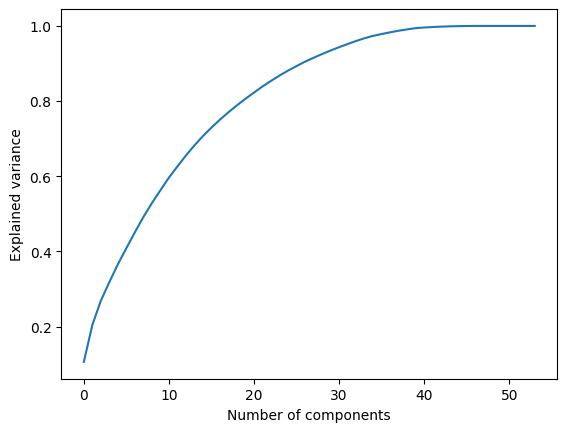

In [170]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(standardized_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()


In [171]:
# We can do this to get the number of components that reach 0.8 of total variance
pca = PCA(n_components=0.8)
pca.fit(standardized_df)
reduce_df = pca.transform(standardized_df)
reduce_df.shape
# this will be the dataset used for the classification using the K-means

(675, 20)

In [172]:
# Instead let's try to visuale the points looking for clusters
pca = PCA(n_components=2)
reduce_df2 = pca.fit(standardized_df)
reduce_df2 = pca.transform(standardized_df)
reduce_df2 = pd.DataFrame(data = reduce_df2, columns=["PC1", "PC2"])
reduce_df2.shape


(675, 2)

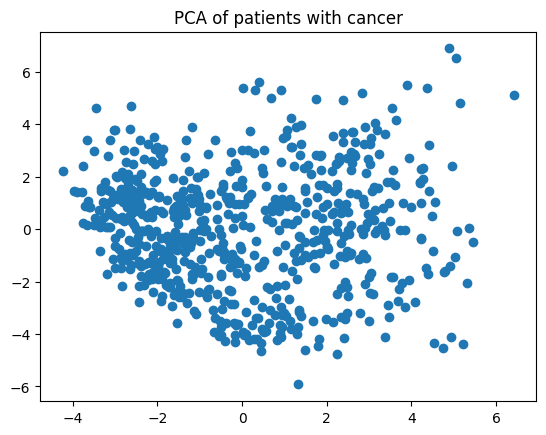

In [173]:
plt.scatter(reduce_df2["PC1"],reduce_df2["PC2"])
plt.title("PCA of patients with cancer")
plt.show()

Let's try the same but in 3-D

In [174]:
pca3 = PCA(n_components=3)
reduce_df3 = pca3.fit(standardized_df)
reduce_df3 = pca3.transform(standardized_df)
reduce_df3 = pd.DataFrame(data = reduce_df3, columns=["PC1", "PC2", "PC3"])
reduce_df3.shape

(675, 3)

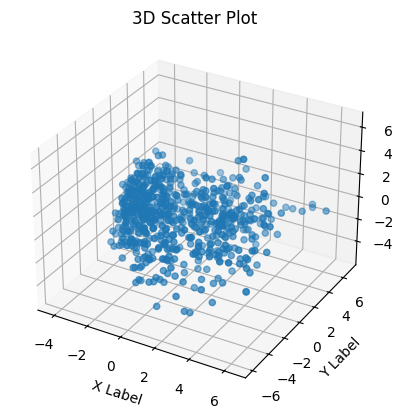

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = reduce_df3["PC1"]
y = reduce_df3["PC2"]
z = reduce_df3["PC3"]

ax.scatter(x, y, z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

# K-Means

Let's try first using the standardized dataset without PCA

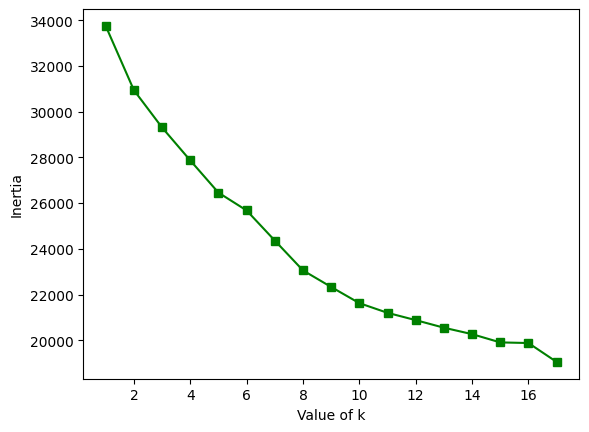

In [176]:
from sklearn.cluster import KMeans

inertia_scores = []
for i in range(1,18):
    model = KMeans(n_clusters=i, init = "k-means++",random_state=42)
    model.fit(standardized_df)
    inertia_scores.append(model.inertia_)

plt.plot(range(1,18),inertia_scores, 'gs-')
plt.xlabel("Value of k")
plt.ylabel("Inertia")
plt.show()

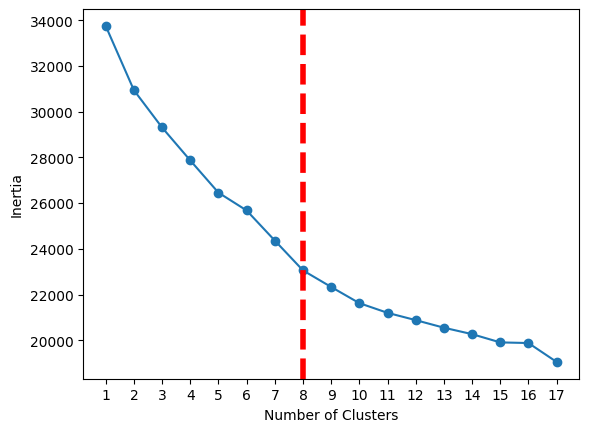

In [177]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 18), inertia_scores, curve = "convex", direction = "decreasing")
plt.plot (range (1,18), inertia_scores , marker = 'o')
plt.xticks (range (1, 18))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show()

Let's perform the classification

In [178]:
model = KMeans(n_clusters=4, random_state=42).fit(standardized_df)
preds = model.predict(standardized_df)
centers = model.cluster_centers_

In [179]:
preds.shape

(675,)

In [180]:
ids.shape

(675, 3)

In [191]:
mapping = pd.DataFrame({'Preds': preds,'Cancer Type': df_cleaned['Cancer Type'], "Age at Diagnosis":df_cleaned["Age at Diagnosis"]})
mapping.head()

,Preds,Cancer Type,Age at Diagnosis
0,1,0,65.0
1,3,0,68.0
3,1,0,75.0
4,5,0,52.0
6,2,0,53.0


In [193]:
count_averages = mapping.groupby('Preds')["Age at Diagnosis"].mean()
count_averages

Preds
0    45.578947
1    66.377358
2    43.829897
3    66.253521
4    67.983051
5    58.325926
Name: Age at Diagnosis, dtype: float64

In [200]:
cancer_type_frequencies = mapping.groupby('Preds').mean()
cancer_type_frequencies

,Cancer Type,Age at Diagnosis
Preds,,
0,0.0,45.578947
1,0.0,66.377358
2,0.0,43.829897
3,0.0,66.253521
4,0.0,67.983051
5,0.0,58.325926


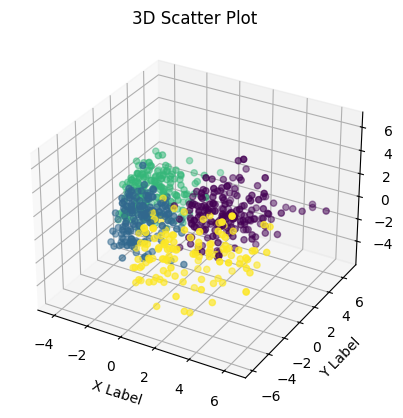

In [182]:
pca3 = PCA(n_components=3)
reduce_df3 = pca3.fit(standardized_df)
reduce_df3 = pca3.transform(standardized_df)
reduce_df3 = pd.DataFrame(data = reduce_df3, columns=["PC1", "PC2", "PC3"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = reduce_df3["PC1"]
y = reduce_df3["PC2"]
z = reduce_df3["PC3"]

ax.scatter(x, y, z,c = preds)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

plt.show()

In [183]:
merged_df = pd.merge(reduce_df2, df,left_index=True, right_index=True)
merged_df.head()

,PC1,PC2,Age at Diagnosis,Age At Specimen Acquisition,FLT3-ITD Allelic Ratio,Cancer Type,Cancer Type Detailed,Cause Of Death,Center ID,Cohort,...,Number of Samples Per Patient,Sex,Somatic Status,"Diagnosis MDS, MPN",Specific Diagnosis At Inclusion,Specimen Groups,Specimen Type,"Time Of Sample Collection, Relative To Inclusion",TMB (nonsynonymous),Used In Manuscript
0,-1.177347,-1.920963,65.0,65.0,0.0,Leukemia,Acute Myeloid Leukemia,Dead-Treatment,2,Waves1+2,...,1,Male,MATCHED,False,AML with mutated NPM1,Initial Acute Leukemia Diagnosis,Bone Marrow Aspirate,0,0.900000,Yes
1,3.693852,-2.755371,68.0,68.0,0.0,Leukemia,Acute Myeloid Leukemia,Dead-Disease,5,Waves1+2,...,1,Male,MATCHED,False,AML with myelodysplasia-related changes,Post-Chemotherapy|Residual Disease,Bone Marrow Aspirate,34,1.033333,Yes
2,0.908253,-2.959259,71.0,71.0,0.0,Leukemia,Acute Myeloid Leukemia,Dead-Disease,2,Waves1+2,...,1,Male,MATCHED,False,AML with myelodysplasia-related changes,Post-Chemotherapy|Initial Acute Leukemia Diagn...,Peripheral Blood,0,0.966667,Yes
3,3.384871,3.608003,75.0,75.0,0.0,Leukemia,Acute Myeloid Leukemia,Dead-Disease,1,Waves1+2,...,1,Male,MATCHED,False,Therapy-related myeloid neoplasms,Initial Acute Leukemia Diagnosis|Post-Chemothe...,Bone Marrow Aspirate,0,0.500000,Yes
4,-1.182613,0.988044,52.0,53.0,0.0,Leukemia,Acute Leukemias of Ambiguous Lineage,Dead-Disease,1,Both,...,1,Male,UNMATCHED,False,"Mixed phenotype acute leukaemia, T/myeloid, NOS",Post-Transplant|Post-Chemotherapy|Residual Dis...,Peripheral Blood,234,0.066667,No


Let's perform a K-means classification using the 0.80% variance dataset

First step is finding the right number of clusters.
Let's use the elbow rule!

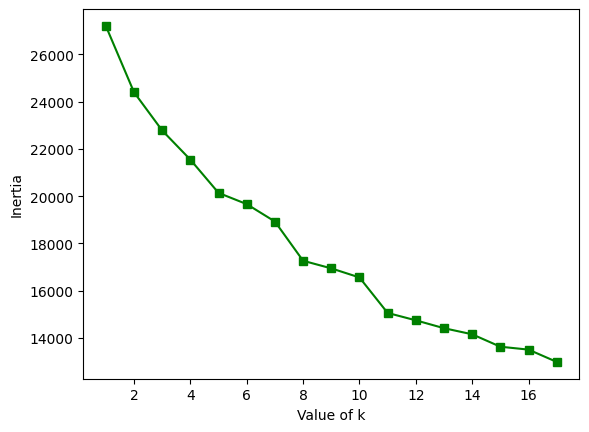

In [184]:
from sklearn.cluster import KMeans

inertia_scores = []
for i in range(1,18):
    model = KMeans(n_clusters=i, init = "k-means++",random_state=42)
    model.fit(reduce_df)
    inertia_scores.append(model.inertia_)

plt.plot(range(1,18),inertia_scores, 'gs-')
plt.xlabel("Value of k")
plt.ylabel("Inertia")
plt.show()

In [185]:
from kneed import KneeLocator
k1 = KneeLocator (range (1, 18), inertia_scores, curve = "convex", direction = "decreasing")
k1.elbow

8

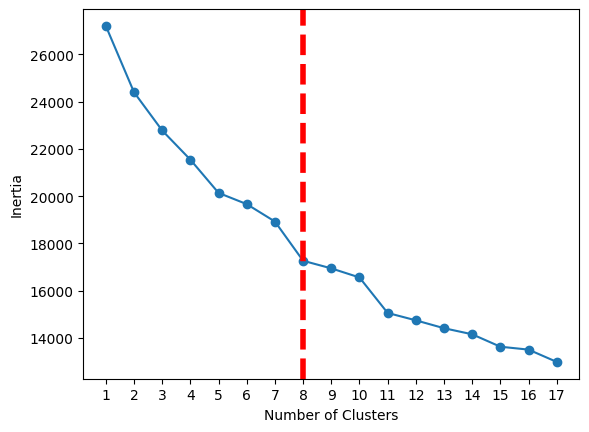

In [186]:
plt.plot (range (1,18), inertia_scores , marker = 'o')
plt.xticks (range (1, 18))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = k1.elbow, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show()

In [187]:
model = KMeans(n_clusters=6, random_state=42).fit(standardized_df)
preds = model.predict(standardized_df)
centers = model.cluster_centers_
pca_centers = pca.transform(centers)

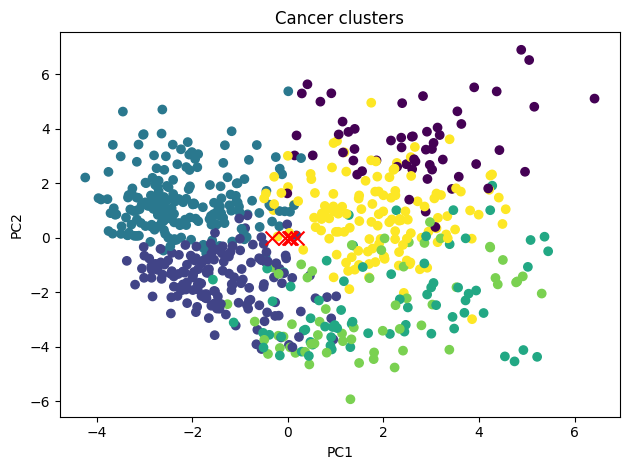

In [188]:
plt.scatter(reduce_df2["PC1"],reduce_df2["PC2"],c = preds)
plt.scatter(centers[:,1],centers[:,0],marker="x",s = 100, c = "red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cancer clusters")
plt.tight_layout()